## Feature Selection Methods in Scikit-Learn

There is a nice reference page for feature selection methods in scikit-learn [here](https://scikit-learn.org/stable/modules/feature_selection.html). We are going to cover some of these methods here. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits["data"]
y = digits["target"]

X = X / 16.0

In [8]:
X.shape

(1797, 64)

In [4]:
y

array([0, 1, 2, ..., 8, 9, 8])

### Removing Features with Low Variance

* Be careful with feature scales
* Be careful, you may remove informative features for some problems (e.g. a feature with high prediction power in a highly imbalanced setting)

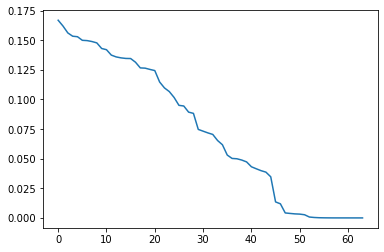

In [5]:
feat_vars = X.var(axis=0)
plt.plot(np.sort(feat_vars)[::-1])

In [6]:
feat_vars

array([0.00000000e+00, 3.21304497e-03, 8.82648138e-02, 7.04789494e-02,
       7.17635423e-02, 1.25353211e-01, 4.31821307e-02, 4.20142315e-03,
       3.46592230e-05, 3.98818618e-02, 1.14749316e-01, 6.17657862e-02,
       8.93019704e-02, 1.43038814e-01, 5.02130490e-02, 2.67602298e-03,
       1.51860912e-05, 4.99328648e-02, 1.26432839e-01, 1.31453694e-01,
       1.48899995e-01, 1.49943064e-01, 4.14876440e-02, 7.51018380e-04,
       4.34268500e-06, 3.86529570e-02, 1.49687484e-01, 1.35115947e-01,
       1.47762439e-01, 1.34639522e-01, 5.30562303e-02, 8.67569272e-06,
       0.00000000e+00, 4.72900421e-02, 1.56169570e-01, 1.53401806e-01,
       1.37448102e-01, 1.34552049e-01, 4.88492427e-02, 0.00000000e+00,
       8.22932760e-05, 3.47120320e-02, 1.66879158e-01, 1.61985373e-01,
       1.52967499e-01, 1.26644419e-01, 7.32292989e-02, 3.68808875e-04,
       1.62827704e-04, 1.19037230e-02, 1.24385180e-01, 1.06663198e-01,
       1.09750290e-01, 1.42010084e-01, 9.44808146e-02, 3.78322621e-03,
      

In [7]:
from sklearn.feature_selection import VarianceThreshold

# There are several breakpoints above. Let's use 0.075 based on this figure
vt = VarianceThreshold(threshold=0.075)
X_fs = vt.fit_transform(X)
print(X_fs.shape)

(1797, 29)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify = y, test_size=0.4, 
                                                shuffle = True, random_state=522)

In [11]:
logRegClassifier = LogisticRegression(C = 1.0, max_iter = 10000)
logRegClassifier.fit(Xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [12]:
def simple_performance(clf, Xtrain, Xtest, ytrain, ytest, name = None, metric = accuracy_score):
    ytrainPred = clf.predict(Xtrain)
    ypred = clf.predict(Xtest)
    if name:
        print(name)
    print("Training set performance:", metric(ytrain, ytrainPred))
    print("Test set performance:", metric(ytest, ypred))
    
simple_performance(logRegClassifier, Xtrain, Xtest, ytrain, ytest, 'baseline lr', accuracy_score)

baseline lr
Training set performance: 0.987012987012987
Test set performance: 0.96105702364395


In [13]:
Xtrain_fs, Xtest_fs, ytrain, ytest = train_test_split(X_fs, y, stratify = y, test_size=0.4, 
                                                      shuffle = True, random_state=522)

logRegClassifier_fs = LogisticRegression(C = 1.0, max_iter = 10000)
logRegClassifier_fs.fit(Xtrain_fs, ytrain)

simple_performance(logRegClassifier_fs, Xtrain_fs, Xtest_fs, ytrain, ytest, 'var threshold lr', accuracy_score)

var threshold lr
Training set performance: 0.9721706864564007
Test set performance: 0.9485396383866481


### Univariate Feature Selection

Using statistics between a single input dimension and output for feature selection. We can take the K best ones or select based on performance percentiles

In [14]:
from sklearn.feature_selection import chi2, f_classif, f_regression, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [15]:
selK = SelectKBest(mutual_info_classif, k = 20)
XK = selK.fit_transform(X, y)

print(selK.scores_)
print()
print(selK.get_support())

[8.95160204e-03 1.17975680e-01 3.61457506e-01 1.80876725e-01
 1.64776956e-01 2.72476678e-01 1.84183867e-01 4.82997691e-02
 1.11737802e-04 2.85333812e-01 3.62101397e-01 1.42387517e-01
 2.01278043e-01 3.40135887e-01 1.41641736e-01 1.32313709e-02
 0.00000000e+00 2.04796790e-01 2.33518272e-01 2.83893772e-01
 3.60396016e-01 4.32700778e-01 2.24728674e-01 3.02012839e-02
 1.30106120e-02 2.51905119e-01 4.11390251e-01 2.69642590e-01
 3.83863781e-01 3.04293761e-01 3.98905956e-01 0.00000000e+00
 0.00000000e+00 4.55594666e-01 4.26689954e-01 2.64861980e-01
 3.55897723e-01 2.45279327e-01 3.37130053e-01 0.00000000e+00
 4.38198784e-02 3.33292309e-01 4.17189699e-01 3.68053738e-01
 2.71068471e-01 1.85602719e-01 3.42108121e-01 2.16579697e-02
 0.00000000e+00 5.00151056e-02 2.78665181e-01 2.49681443e-01
 1.73920247e-01 3.42642821e-01 3.54677304e-01 1.04326981e-01
 0.00000000e+00 1.01634748e-01 3.55838360e-01 2.15924643e-01
 2.91005977e-01 3.84930949e-01 3.04896072e-01 1.13975568e-01]

[False False  True Fal

In [16]:
print(X.shape)
print(XK.shape)

(1797, 64)
(1797, 20)


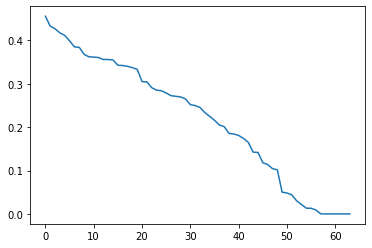

In [17]:
plt.plot(np.sort(selK.scores_)[::-1])
plt.show()

In [18]:
selP = SelectPercentile(mutual_info_classif, percentile = 25)
XP = selP.fit_transform(X, y)

print(selP.scores_)
print()
print(selP.get_support())

[0.         0.12137489 0.33371398 0.17433564 0.15061657 0.26438663
 0.18432359 0.06019018 0.         0.24102086 0.35249047 0.12560293
 0.19091434 0.32741749 0.15553777 0.05974074 0.0173456  0.1962594
 0.28731029 0.27776215 0.38982872 0.39776081 0.20984757 0.0109016
 0.         0.24862522 0.40736974 0.27496271 0.37306965 0.30251645
 0.3850731  0.01958897 0.00841555 0.43346438 0.39955535 0.30289797
 0.37970522 0.26756167 0.36117887 0.         0.01980608 0.28048696
 0.3982784  0.38689816 0.31371503 0.19476072 0.3045355  0.01053074
 0.0236127  0.07605778 0.25561193 0.25117064 0.17868646 0.31433232
 0.35389109 0.06604001 0.02817006 0.12131508 0.35322327 0.18586404
 0.2633858  0.38440524 0.31078084 0.06262396]

[False False  True False False False False False False False  True False
 False False False False False False False False  True  True False False
 False False  True False  True False  True False False  True  True False
  True False  True False False False  True  True False False False

In [19]:
print(X.shape)
print(XP.shape)

(1797, 64)
(1797, 16)


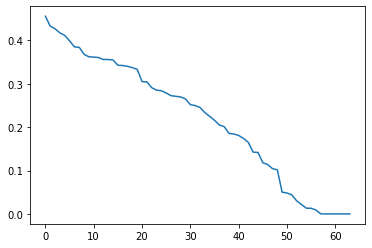

In [20]:
plt.plot(np.sort(selK.scores_)[::-1])
plt.show()

If you have correlated features, you may be wasting a space by selecting them both without much benefit so filtering based on feature correlations maybe needed.

## Feature Importances

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50)

rf.fit(X, y)

RandomForestClassifier(n_estimators=50)

Highest 20:
1. Feature: 21 (0.050997)
2. Feature: 36 (0.038234)
3. Feature: 26 (0.038049)
4. Feature: 42 (0.037791)
5. Feature: 28 (0.036902)
6. Feature: 43 (0.036842)
7. Feature: 30 (0.036225)
8. Feature: 33 (0.031722)
9. Feature: 20 (0.030802)
10. Feature: 53 (0.030293)
11. Feature: 54 (0.029819)
12. Feature: 38 (0.028443)
13. Feature: 61 (0.027645)
14. Feature: 27 (0.026526)
15. Feature: 13 (0.026440)
16. Feature: 34 (0.025625)
17. Feature: 2 (0.024714)
18. Feature: 19 (0.024547)
19. Feature: 10 (0.023524)
20. Feature: 37 (0.022754)


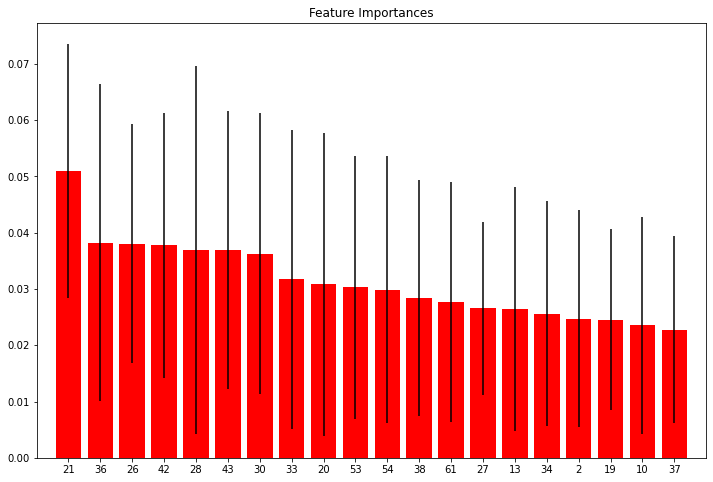

In [22]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Highest 20:")
for f in range(20):
    print("%d. Feature: %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (12, 8))
plt.title("Feature Importances")
plt.bar(range(20), importances[indices[0:20]],
        color = "r", yerr = std[indices[0:20]], align = "center")
plt.xticks(range(20), indices[0:20])
plt.xlim([-1, 20])
plt.show()

(0.0, 0.08)

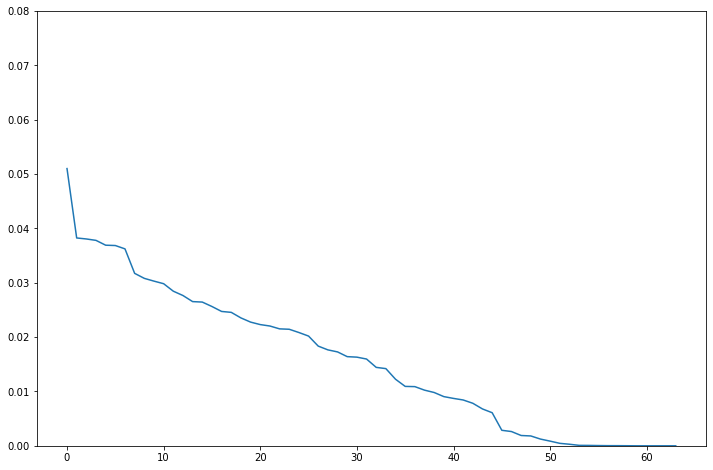

In [23]:
plt.figure(figsize = (12, 8))
plt.plot(importances[indices])
plt.ylim([0,0.08])

## Recursive Feature Elimination (RFE)

This method can be used with methods that calculate **feature importances** or **weights**. RFE removes the least important (lowest weighted) feature one by one until the desired number of features are achieved. 

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE, RFECV

gbc = GradientBoostingClassifier()

rfe = RFE(gbc, n_features_to_select = 20)
rfe.fit(X, y)

RFE(estimator=GradientBoostingClassifier(), n_features_to_select=20)

In [25]:
print("Number of selected features: %d" % rfe.n_features_)
print(rfe.support_)

Number of selected features: 20
[False False False False False  True False False False False  True False
 False False False False False False False  True  True  True False False
 False False  True  True  True  True False False False  True False False
  True False  True False False False  True  True False False  True False
 False False False  True False False  True False False False  True False
  True False  True False]


In [26]:
# Cross Validation with number of features built-in RFECV
#rfe = RFECV(estimator = gbc, step = 1, cv = StratifiedKFold(2), scoring = "accuracy")
#rfe.fit(X, y)

# Plot number of features VS. cross-validation scores
#plt.figure(figsize = (12, 8))
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
#plt.show()

[45 30 10 17 23  1 16 24 35 27  1 33 15  3 21 28 36 22  7  1  1  1 18 41
 38 29  1  1  1  1  4 34 44  1 20 13  1  9  1 42 43 12  1  1  8  2  1 37
 40 26 19  1  5  6  1 39 31 32  1 25  1 11  1 14]


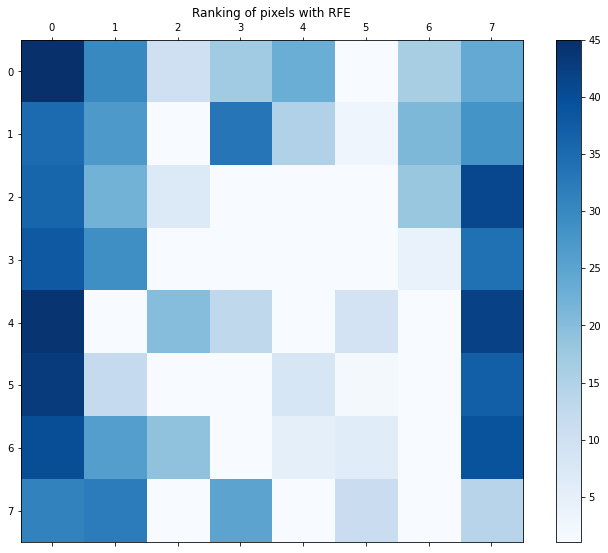

In [27]:
ranking = rfe.ranking_.reshape(digits.images[0].shape)
print(rfe.ranking_)

# Plot pixel ranking
f = plt.figure(figsize = (12, 9))
plt.matshow(ranking, cmap = plt.cm.Blues, fignum = f.number)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

**Feature Importances with L1 Loss**

In [28]:
logRegClassifier_l1 = LogisticRegression(C = 1, max_iter = 10000, penalty='l1', solver='liblinear')
logRegClassifier_l1.fit(Xtrain, ytrain)
    
simple_performance(logRegClassifier_l1, Xtrain, Xtest, ytrain, ytest, 'l1 lr', accuracy_score)

l1 lr
Training set performance: 0.9777365491651205
Test set performance: 0.9554937413073713


In [29]:
logRegClassifier_l1.coef_.shape

(10, 64)

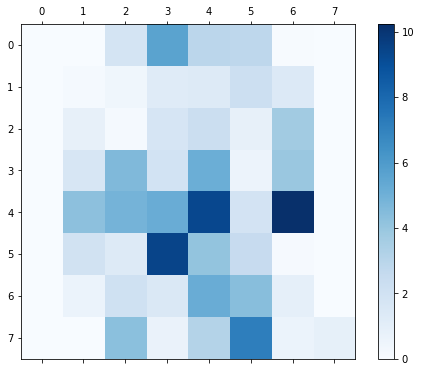

In [30]:
f = plt.figure(figsize = (8, 6))
plt.matshow(np.abs(logRegClassifier_l1.coef_.sum(axis=0).reshape(8,8)), cmap = plt.cm.Blues, fignum = f.number)
plt.colorbar()
plt.show()

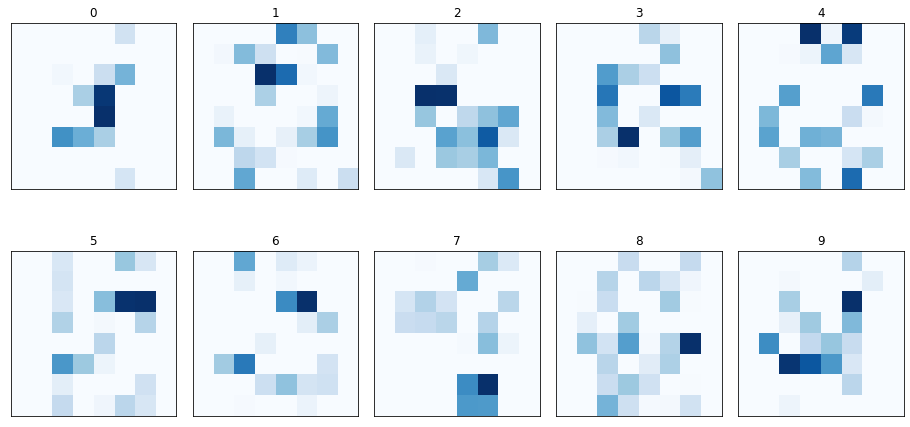

In [31]:
fig, axes = plt.subplots(2, 5, figsize = (16, 8),
                         subplot_kw = {"xticks": [], "yticks": []},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.abs(logRegClassifier_l1.coef_[i,:].reshape(8, 8)), cmap = plt.cm.Blues, interpolation = "nearest")
    ax.set_title(i)

## Feature Selection Based on Models

A mixture of all the above

In [32]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(LogisticRegression(C = 0.05, max_iter = 10000, penalty='l1', solver='liblinear'), threshold = 1.25)
sfm.fit(Xtrain, ytrain)
n_features = sfm.transform(X).shape[1]
print("Number of features with L1: %d" % n_features)
print(sfm.get_support())

Number of features with L1: 15
[False False False False False False False False False False  True False
 False  True False False False False False False  True  True False False
 False False  True  True  True False False False False  True False False
  True  True False False False False  True  True False False False False
 False False False False  True False False False False False False False
  True  True False False]


In [33]:
np.abs(sfm.estimator_.coef_).max(axis=0)

array([0.        , 0.        , 0.02320072, 0.62834541, 0.31920133,
       0.65645205, 0.        , 0.        , 0.        , 0.        ,
       2.88551876, 0.        , 0.12361131, 1.33263564, 0.        ,
       0.        , 0.        , 0.        , 0.93511229, 0.        ,
       1.06789566, 2.6397852 , 0.        , 0.        , 0.        ,
       0.        , 1.82175928, 0.84249079, 1.99428077, 0.37841962,
       0.        , 0.        , 0.        , 1.30199551, 0.64356394,
       0.0576646 , 2.71237121, 1.59279609, 0.        , 0.        ,
       0.        , 0.        , 1.88327962, 1.79486709, 0.35170265,
       0.85601295, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.69000187, 1.06100322, 0.74049897, 0.60378097,
       0.        , 0.        , 0.        , 0.41030771, 0.        ,
       3.48402528, 1.22461324, 0.86907249, 0.        ])

In [34]:
simple_performance(sfm.estimator_, Xtrain, Xtest, ytrain, ytest, 'sfm lr', accuracy_score)

sfm lr
Training set performance: 0.8608534322820037
Test set performance: 0.8511821974965229


In [35]:
sfmRF = SelectFromModel(RandomForestClassifier(), threshold = 0.025)
sfmRF.fit(X, y)
n_features = sfmRF.transform(X).shape[1]
print("Number of features with RF: %d" % n_features)
print(sfmRF.get_support())

Number of features with RF: 16
[False False False False False False False False False False False False
 False  True False False False False False  True  True  True False False
 False False  True  True  True False  True False False  True  True False
  True False  True False False False  True  True False False False False
 False False False False False False False False False False  True False
 False  True False False]


**Exercise:** Let's use the digits dataset with a feature selection algorithm for classification by incorporating pipelining and hyper-parameter tuning.

In [36]:
logRegClassifier_l1.coef_.mean(axis=0)

array([ 0.        ,  0.        , -0.18366357, -0.5614919 , -0.28876675,
       -0.28284436,  0.00661023,  0.        ,  0.        , -0.01293411,
        0.03843428, -0.12317161, -0.12975659,  0.22190816, -0.13938512,
        0.        ,  0.        , -0.08102175, -0.01488486,  0.17116718,
       -0.22798551, -0.08306391, -0.36844415,  0.        ,  0.        ,
       -0.16637862, -0.45940357, -0.19190798, -0.5089764 , -0.05775024,
       -0.39554408,  0.        ,  0.        , -0.42508823, -0.4873392 ,
        0.51723963, -0.93199304, -0.18781857, -1.02417036,  0.        ,
        0.        , -0.19479937, -0.13470323, -0.9428897 , -0.41189508,
       -0.25101304,  0.00982829,  0.        ,  0.        ,  0.06266223,
       -0.20693791,  0.1487961 , -0.51717874, -0.43916659, -0.09033495,
        0.        ,  0.        ,  0.        , -0.43141412, -0.06742799,
       -0.31407778, -0.71486629,  0.06250044, -0.08426056])

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

fs = SelectFromModel(LogisticRegression(max_iter = 10000, penalty='l1', solver='liblinear'))
lr = LogisticRegression(max_iter = 10000)

fs_pipe_steps = [('fs',fs),('logreg', lr)]

fs_pipe = Pipeline(fs_pipe_steps)

# Looking for both the threshold and C is bad
# Recall the reasoning from the class discussion
params = {'fs__threshold':np.linspace(0.001,0.2,100), 
          'fs__estimator__C':np.logspace(-2,2,10), 
          'logreg__C':np.logspace(-2,2,10)}

cv = StratifiedKFold(n_splits=3)

rscv = RandomizedSearchCV(fs_pipe, params, cv=cv, n_iter=50)

rscv.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('fs',
                                              SelectFromModel(estimator=LogisticRegression(max_iter=10000,
                                                                                           penalty='l1',
                                                                                           solver='liblinear'))),
                                             ('logreg',
                                              LogisticRegression(max_iter=10000))]),
                   n_iter=50,
                   param_distributions={'fs__estimator__C': array([1.00000000e-02, 2.78255940e-02, 7.7426...
       0.16180808, 0.16381818, 0.16582828, 0.16783838, 0.16984848,
       0.17185859, 0.17386869, 0.17587879, 0.17788889, 0.17989899,
       0.18190909, 0.18391919, 0.18592929, 0.18793939, 0.18994949,
       0.1919596 , 0.1939697 , 0.1959798 , 0.1979899 , 0

In [38]:
rscv.best_estimator_

Pipeline(steps=[('fs',
                 SelectFromModel(estimator=LogisticRegression(C=100.0,
                                                              max_iter=10000,
                                                              penalty='l1',
                                                              solver='liblinear'),
                                 threshold=0.18793939393939393)),
                ('logreg',
                 LogisticRegression(C=4.6415888336127775, max_iter=10000))])

In [39]:
simple_performance(rscv, Xtrain, Xtest, ytrain, ytest, 'rscv lr', accuracy_score)

rscv lr
Training set performance: 0.9990723562152134
Test set performance: 0.9638386648122392


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

fs = SelectKBest(mutual_info_classif)
lr = LogisticRegression(max_iter = 1000)

fs_pipe_steps = [('fs',fs),('logreg', lr)]

fs_pipe = Pipeline(fs_pipe_steps)

params = {'fs__k':np.arange(1,65),
          'logreg__C':np.logspace(-2,2,10)}

cv = StratifiedKFold(n_splits=3)

rscv = RandomizedSearchCV(fs_pipe, params, cv=cv, n_iter=50)

rscv.fit(Xtrain, ytrain)

KeyboardInterrupt: 

In [ ]:
rscv.best_estimator_

In [ ]:
simple_performance(rscv, Xtrain, Xtest, ytrain, ytest, 'rscv lr', accuracy_score)

### Backward and Forward Selection

Forward selection; start from zero features and greedily add more. Backward selection; start from all features and greedily remove. In effect RFE is an instance of backward selection. Scikit-learn has additional functionality to perform both forward and backward selection.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

logReg_sfs_fwd = LogisticRegression()

sfs_fwd = SequentialFeatureSelector(logReg_sfs_fwd, n_features_to_select=3)
sfs_fwd.fit(Xtrain, ytrain)

print(sfs_fwd.transform(Xtrain).shape)

In [ ]:
sfs_fwd.get_support()

In [ ]:
logReg_sfs_bwd = LogisticRegression(max_iter=10000)

sfs_bwd = SequentialFeatureSelector(logReg_sfs_bwd, n_features_to_select=60, direction='backward')
sfs_bwd.fit(Xtrain, ytrain)

print(sfs_bwd.transform(Xtrain).shape)

In [ ]:
sfs_bwd.get_support()

## Other Methods

* Information based
* Genetic Algorithms
* Global explanation based (similar to feature importances)
* Relief based